# Explore here

In [1]:
# Your code 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score)
                                                       

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df_raw.sample(7, random_state=2024)

,age,sex,bmi,children,smoker,region,charges
380,27,female,17.955,2,yes,northeast,15006.57945
684,33,female,18.500,1,no,southwest,4766.02200
356,46,male,43.890,3,no,southeast,8944.11510
208,63,female,31.800,0,no,southwest,13880.94900
20,60,female,36.005,0,no,northeast,13228.84695
721,53,male,36.600,3,no,southwest,11264.54100
1048,25,female,22.515,1,no,northwest,3594.17085


In [ ]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_')
        .str.replace(r'\W','', regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .rename(columns={'charges':'target'})
)

In [5]:
df_interim = df_interim.drop_duplicates().reset_index(drop = True)
df_interim.head()

,age,sex,bmi,children,smoker,region,target
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    1337 non-null   float64
 1   age       1337 non-null   int64  
 2   sex       1337 non-null   object 
 3   bmi       1337 non-null   float64
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   object 
 6   region    1337 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.2)
df_train = df_train.reset_index(drop=True).sort_values(by='target')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 269 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    1069 non-null   float64
 1   age       1069 non-null   int64  
 2   sex       1069 non-null   object 
 3   bmi       1069 non-null   float64
 4   children  1069 non-null   int64  
 5   smoker    1069 non-null   object 
 6   region    1069 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 66.8+ KB


In [8]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
target,1069.0,13541.821497,12334.388474,1121.8739,4753.6368,9541.69555,17043.3414,63770.42801
age,1069.0,39.357343,14.062444,18.0000,27.0000,39.00000,51.0000,64.00000
bmi,1069.0,30.668363,6.159991,15.9600,26.2200,30.30500,34.8000,53.13000
children,1069.0,1.101964,1.200767,0.0000,0.0000,1.00000,2.0000,5.00000


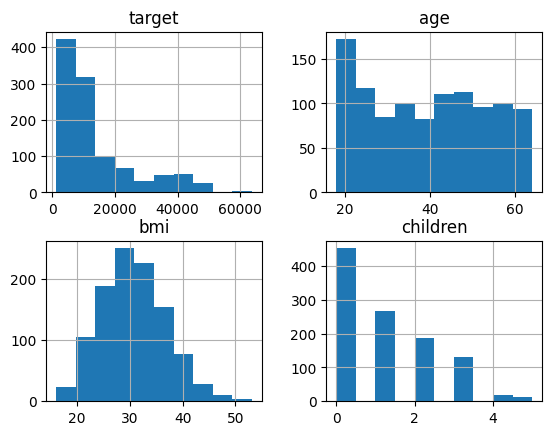

In [9]:
df_train.hist()
plt.show()

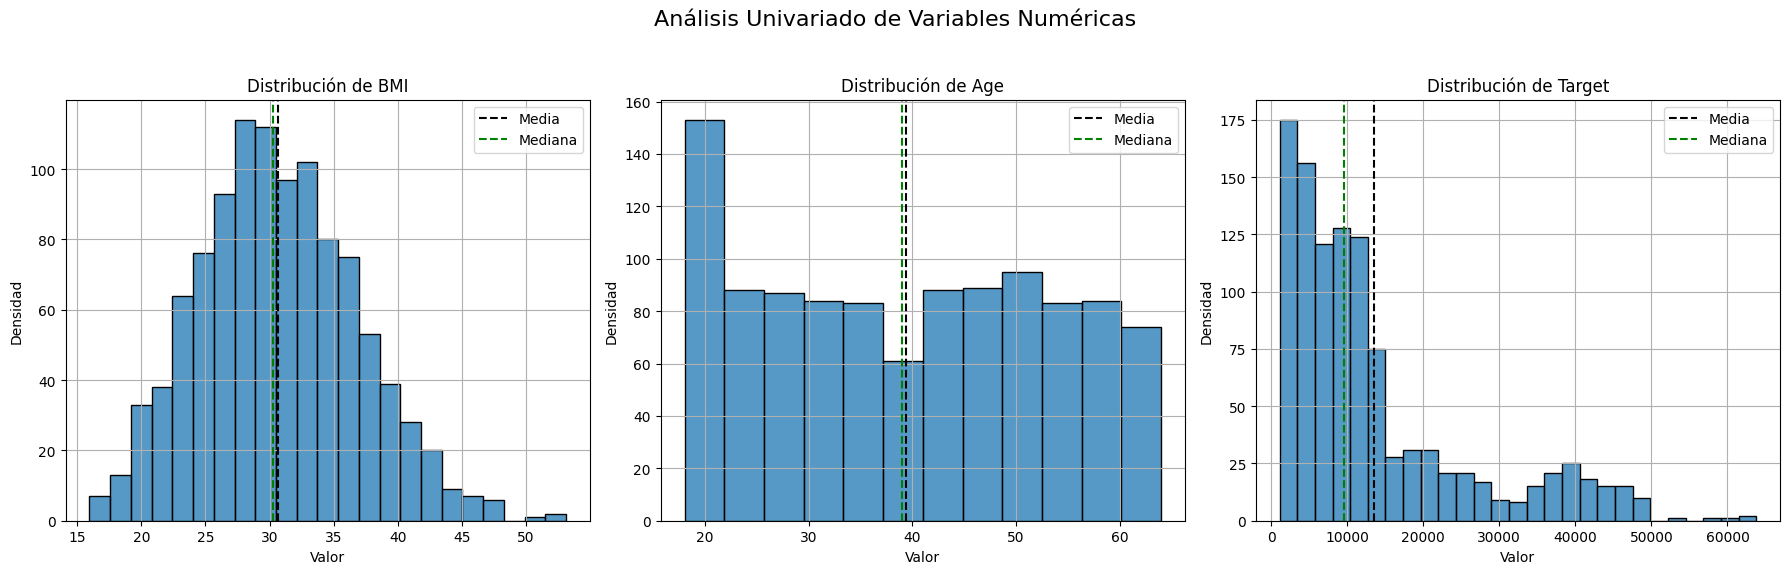

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

# Histograma BMI
sns.histplot(data=df_train, x='bmi', ax=ax[0])
ax[0].axvline(x=df_train['bmi'].mean(), color='k', linestyle='--', label='Media')
ax[0].axvline(x=df_train['bmi'].median(), color='g', linestyle='--', label='Mediana')
ax[0].set_title('Distribución de BMI')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Densidad')
ax[0].legend(loc='upper right')

# 'age'
sns.histplot(data=df_train, x='age', ax=ax[1])
ax[1].axvline(x=df_train['age'].mean(), color='k', linestyle='--', label='Media')
ax[1].axvline(x=df_train['age'].median(), color='g', linestyle='--', label='Mediana')
ax[1].set_title('Distribución de Age')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Densidad')
ax[1].legend(loc='upper right')

# target'
sns.histplot(data=df_train, x='target', ax=ax[2])
ax[2].axvline(x=df_train['target'].mean(), color='k', linestyle='--', label='Media')
ax[2].axvline(x=df_train['target'].median(), color='g', linestyle='--', label='Mediana')
ax[2].set_title('Distribución de Target')
ax[2].set_xlabel('Valor')
ax[2].set_ylabel('Densidad')
ax[2].legend(loc='upper right')

# Añadir un título general a la figura
fig.suptitle('Análisis Univariado de Variables Numéricas', fontsize=16)

# Configurar la grilla en cada gráfico
for a in ax:
    a.grid(True)

# Mostrar la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste del layout para incluir el título
plt.show()

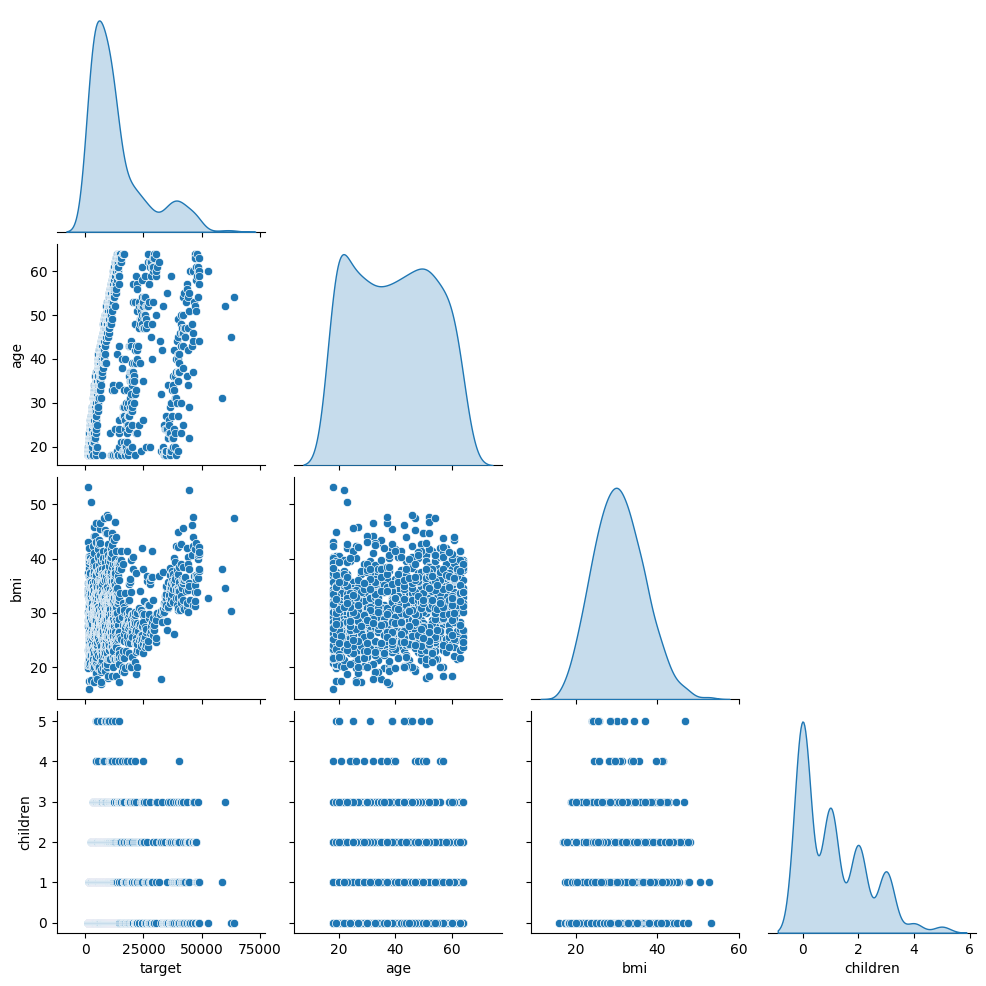

In [11]:
sns.pairplot(data=df_train, diag_kind='kde',corner=True)
plt.show()

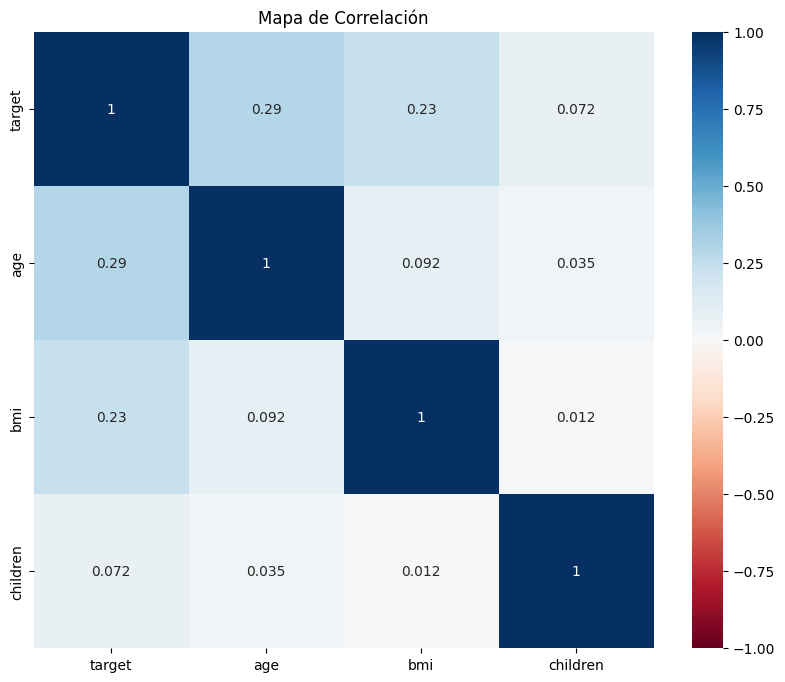

In [12]:
corr_matrix = df_train.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.title('Mapa de Correlación')
plt.show()

In [13]:
X_train = df_train.drop('target', axis=1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis=1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [14]:
# Definir las columnas numéricas y categóricas
num_cols = ['age', 'bmi']
cat_cols = ['smoker']

# Preprocesamiento para columnas numéricas y categóricas
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

# Crear un ColumnTransformer para aplicar las transformaciones adecuadas a cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# Crear el Pipeline con el preprocesador y el modelo de regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo usando el pipeline
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_m = pipeline.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred_m)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_m)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 39399671.01
RMSE: 6276.92
MAE: 4287.04


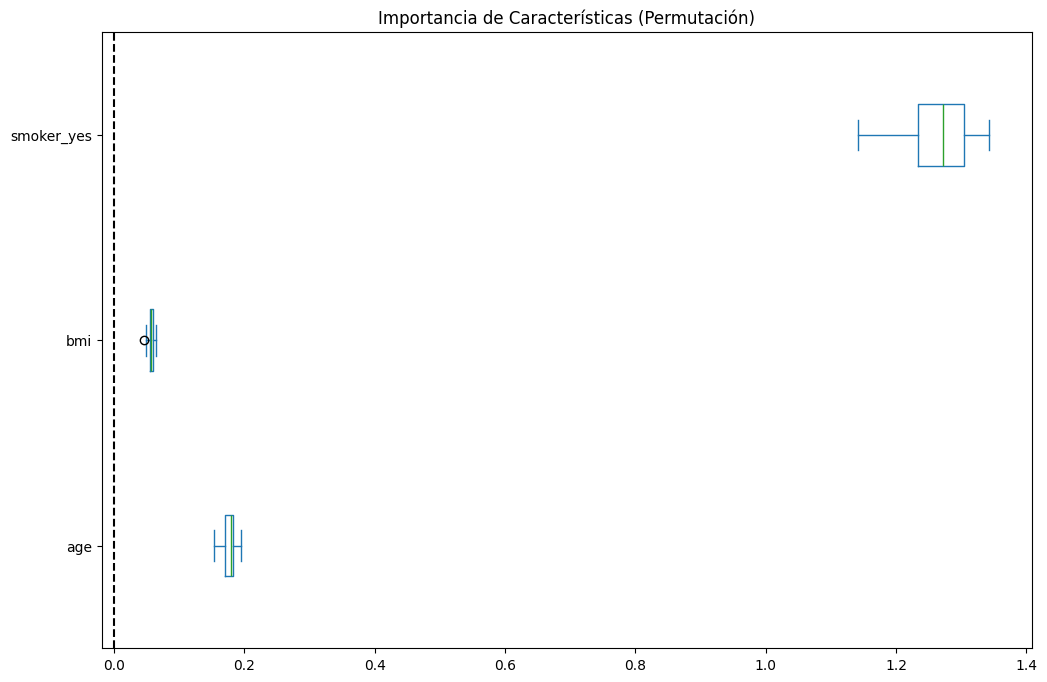

In [15]:
# Primero transformamos X_train utilizando el preprocesador del pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Obtener los nombres de las columnas transformadas
# Nombres de las columnas numéricas
num_feature_names = num_cols

# Obtener los nombres de las columnas categóricas después de One-Hot Encoding
cat_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)

# Concatenar los nombres de las columnas numéricas y categóricas transformadas
feature_names = list(num_feature_names) + list(cat_feature_names)

# Entrenar nuevamente el modelo para asegurar que se ajuste a los datos transformados
reg_mlin = pipeline.named_steps['regressor']
reg_mlin.fit(X_train_transformed, y_train)

# Calcular la importancia por permutación
importance = permutation_importance(reg_mlin, X_train_transformed, y_train, n_repeats=30, random_state=42)

# Convertir la importancia en un DataFrame con los nombres de las columnas transformadas
importance_df = pd.DataFrame(importance.importances.T, columns=feature_names)

# Crear el gráfico para la importancia de características
ax = importance_df.plot.box(vert=False, figsize=(12, 8))
ax.axvline(x=0, color='k', linestyle='--')
plt.title("Importancia de Características (Permutación)")
plt.show()